In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('c:/bd092_data/NewOnlineRetail.csv')
df.info()
df = df[pd.notnull(df['Description'])]
df = df[pd.notnull(df['CustomerID'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63675 entries, 0 to 63674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    63675 non-null  object 
 1   StockCode    63675 non-null  object 
 2   Description  63511 non-null  object 
 3   Quantity     63675 non-null  int64  
 4   InvoiceDate  63675 non-null  object 
 5   UnitPrice    63675 non-null  float64
 6   CustomerID   39225 non-null  float64
 7   Country      63675 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39225 entries, 0 to 63674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    39225 non-null  object 
 1   StockCode    39225 non-null  object 
 2   Description  39225 non-null  object 
 3   Quantity     39225 non-null  int64  
 4   InvoiceDate  39225 non-null  object 
 5   Uni

In [9]:
df = df[df['Quantity']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38217 entries, 0 to 63674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    38217 non-null  object 
 1   StockCode    38217 non-null  object 
 2   Description  38217 non-null  object 
 3   Quantity     38217 non-null  int64  
 4   InvoiceDate  38217 non-null  object 
 5   UnitPrice    38217 non-null  float64
 6   CustomerID   38217 non-null  float64
 7   Country      38217 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ MB


In [13]:

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,15.30,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,20.34,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,22.00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,20.34,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,20.34,3.39,17850.0,United Kingdom


In [16]:
df['CustomerID'] = df['CustomerID'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38217 entries, 0 to 63674
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    38217 non-null  object 
 1   StockCode    38217 non-null  object 
 2   Description  38217 non-null  object 
 3   Quantity     38217 non-null  int64  
 4   InvoiceDate  38217 non-null  object 
 5   Price        38217 non-null  float64
 6   UnitPrice    38217 non-null  float64
 7   CustomerID   38217 non-null  object 
 8   Country      38217 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.9+ MB


In [17]:
df.corr()

,Quantity,Price,UnitPrice
Quantity,1.000000,0.985551,-0.010314
Price,0.985551,1.000000,0.019760
UnitPrice,-0.010314,0.019760,1.000000


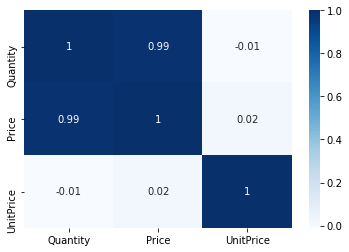

In [18]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [26]:
x = df['Quantity']
y = df['Price']
import statsmodels.api as sm
x1 = sm.add_constant(x, has_constant='add')
mm = sm.OLS(y,x1).fit()
mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.294e+06
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:56:49   Log-Likelihood:            -2.1593e+05
No. Observations:               38217   AIC:                         4.319e+05
Df Residuals:                   38215   BIC:                         4.319e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8659      0.352     28.017      0.000       9.176      10.556
Quantity       1.0456      0.001   1137.471      0.000       1.044       1.047
==============================================================================
Omnibus:                    89283.703   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1678391090.263
Skew:                          22.960   Prob(JB):                         0.00
Kurtosis:                    1028.626   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

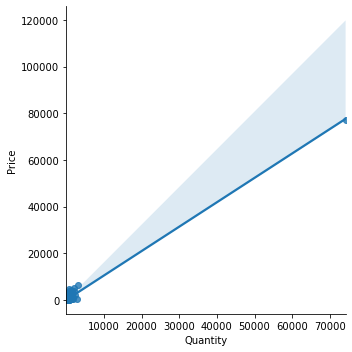

In [27]:
sns.lmplot(y='Price', x='Quantity', data=df)

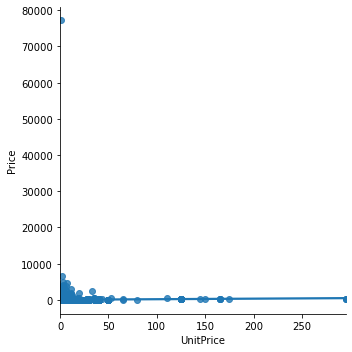

In [28]:
sns.lmplot(y='Price', x='UnitPrice', data=df)

In [29]:
x = df['UnitPrice']
y = df['Price']
import statsmodels.api as sm
x1 = sm.add_constant(x, has_constant='add')
mm = sm.OLS(y,x1).fit()
mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.93
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           0.000112
Time:                        22:57:15   Log-Likelihood:            -2.8378e+05
No. Observations:               38217   AIC:                         5.676e+05
Df Residuals:                   38215   BIC:                         5.676e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4982      2.414      8.491      0.000      15.767      25.230
UnitPrice      1.5146      0.392      3.864      0.000       0.746       2.283
==============================================================================
Omnibus:                   181387.780   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1854445955169.403
Skew:                         179.973   Prob(JB):                         0.00
Kurtosis:                   34127.025   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

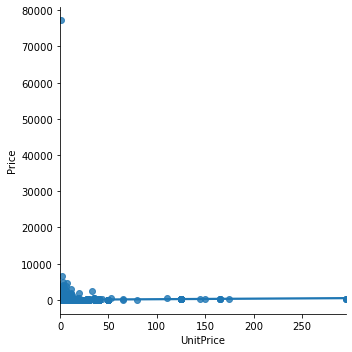

In [30]:
sns.lmplot(y='Price', x='UnitPrice', data=df)

In [34]:
df1 = pd.read_csv('c://bd092_data/ozone.csv')
df1.head()
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


MissingDataError: exog contains inf or nans

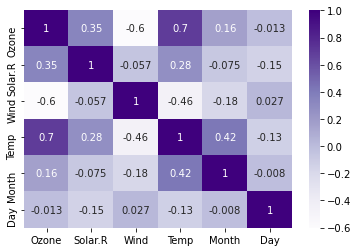

In [48]:
df1.corr()
sns.heatmap(df1.corr(), cmap='Purples', annot=True)
x = df1[['Solar.R', 'Wind', 'Temp', 'Month']]
y = df1['Ozone']
x1 = sm.add_constant(x, has_constant='add')
x1
multi_model23 = sm.OLS(y, x1).fit()
multi_model23.summary()

In [45]:
multi_model23 = sm.OLS(y, x1).fit()
multi_model23.summary()

MissingDataError: exog contains inf or nans